# Statistik
Dies ist eine kleine Zusammenfassung zusammen mit ein paar nice Python Implementierungen um nicht rechnen zu müssen. Hier werden alle nötigen Module / Bibliotheken importiert. Sicherstellen, dass alle mit `pip install` installiert wurden.

In [14]:
import math
import statistics
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
from scipy.stats import binom, norm # pip install scipy
from sklearn.linear_model import LinearRegression # pip install skikit-learn

## Deskriptive Statistik

Beschreibende Statistik

### Grundbegriffe

|Begriff|Beschreibung|Synonym|Beispiel|
|-------|------------|-------|--------|
|Statistische Einheit gamma|Kleinstes Element in der Statistik, Träger von Eigenschaften, die für eine spätere statistische Untersuchung von Interesse sind.|Merkmalsträger, statistisches Element|Ein(e) Student(in) der Statistikvorlesung|
|Statist. Gesamtheit vom Umfang n|Endliche Menge abgegrenzter statistischer Einheiten|Population, Grundgesamtheit, Kollektiv|Menge der Studierenden in diesem Statistikkurs|
|Statistisches Merkmal X|Eigenschaft einer statistischen Einheit, Notation: Lateinische Großbuchstaben|Variable, Beobachtungsmerkmal|Alter eines Studierenden in diesem Statistikkurs|
|Merkmalsausprägung xi|Aussage über ein Merkmal, Notation: Lateinische Kleinbuchstaben|Realisation, Beobachtung|xi=20

### Skalen

*Kategorialskalen:*
- Nominalskala: Gleich oder Ungleich, keine Reihenfolge festlegbar (ledig, verheiratet, geschieden...)
- Ordinalskala: Kategorie mit Reihenfolge (small, medium, large)

*Metrischeskalen:*
- Kardinalskala: Reele Zahlen, Intervall- oder Verhältnissklaiert

### Merkmale

*Diskretes Merkmal:*
kann nur nur endlich oder unendlich viele 
Ausprägungen annehmen kann

*Stetiges Merkmal:*
kann unendlich viele Ausprägungen annehmen. 
Für je zwei Ausprägungen eines stetigen Merkmals 
gilt, dass auch alle Zwischenwerte angenommen 
werden können.

Absolute Häufigkeit h(x): Anzahl Beobachtungen  
Relative Häufigkeit f(x): Anteil aller Beobachtungen (Prozent)  
Kommulierte Absolute Häufigkeit H(x): Aufsummierte Anzahl der Beobachtungen  
Kommulierte Relative Häufigkeit F(x): Aufsummierter Anteil aller Beobachtungen

### Verteilungen

__Hier kann das `statistics` Modul benutzt werden!__ Es gibt auch noch weitere hilfreiche Funktionen als die unten, wie zum Beispiel `.median_low()`: [https://docs.python.org/3/library/statistics.html](https://docs.python.org/3/library/statistics.html)

*Lageparameter:*
- Modus `.mode()`
- Median `.median()`
- Mittelwert `.fmean()`

*Streuungsparameter:*
- Varianz `.pvariance()`
- Standardabweichung `.pstdev()`
- Variationskoeffizient (relative Standardabweichung) `.pstdev()/.mean()`

Das `p` vor z.B. `pvariance()` steht für 'Population'. Das bedeutet, dass es sich hier um keine Schätzung, sondern um die Gesamtmenge handelt. Für Schätzungen (Induktive Statistik) können Funktionen wie `variance()` genutzt werden. (Siehe weiter unten)

In [15]:
data = [1000, 1100, 1100, 1100, 2500, 2600, 2700, 2750, 2790, 2820, 4000, 30000]
# data = np.concatenate((np.full(shape=20, fill_value=1), np.full(shape=30, fill_value=2), np.full(shape=30, fill_value=3), np.full(shape=20, fill_value=4)))
mean = statistics.fmean(data)
print(f"Mode: {statistics.mode(data)}")
print(f"Median: {statistics.median(data):.2f}")
print(f"Mean x: {statistics.fmean(data):.2f}")
print(f"Variance s^2: {statistics.pvariance(data, mean):.4f}")
print(f"Standard Deviation s: {statistics.pstdev(data, mean):.4f}")
print(f"Variationskoeffizient v: {statistics.pstdev(data, mean)/statistics.mean(data):.4f}")

Mode: 1100
Median: 2650.00
Mean x: 4538.33
Variance s^2: 59755947.2222
Standard Deviation s: 7730.1971
Variationskoeffizient v: 1.7033


### Zweidimensionale Daten

Hier ist es am besten, wenn man eine Kontigenztabelle benutzt.

### Korrelationsanalyse

Hierbei kann das Pandas Modul genutzt werden.

- Empirische Kovarianz `.cov()`
- Empirischer Korrelationskoeffizient `.corr()`

`ddof=0` bedeutet, dass es sich hierbei NICHT um eine Schätzung handelt, es sich also um eine Gesamtmenge handelt. Wenn geschätzt wird, muss `ddof=1` gesetzt werden.

In [16]:
df = pd.DataFrame([(1, 1), (1, 1), (4, 2), (4, 3), (2, 2), (5, 2), (3, 2), (3, 6), (4, 1), (4, 4)], columns=['X', 'Y'])
df.cov(ddof=0)

,X,Y
X,1.69,0.56
Y,0.56,2.24


In [17]:
df.corr()

,X,Y
X,1.00000,0.28782
Y,0.28782,1.00000


In [18]:
df.mode()
df.median()
df.mean()
df.var(ddof=0)
df.std(ddof=0)

X    1.300000
Y    1.496663
dtype: float64

### Regressionsanalye

Hierzu kann die Bibliothek scikit-learn benutzt werden. Da diese Bibliothek auch für n-Dimensionale Problemstellungen geeignet ist, muss hier besonders auf die Datentypen und die Matrix / Array Größen und Formen geachet werden.

__Lineare Regression:__

- Nutzung von `LinearRegression().fit(X, Y)`
- Steigung a `regressor.coeff_`
- Parameter b `regressor.intercept_`
- Bestimmtheitsmaß R^2 `regressor.score(X, Y)`

In [19]:
data = pd.DataFrame([(3, 3), (6, 6), (2, 3), (1, 2), (3, 4), (8, 10), (0, 4), (1, 0)], columns=['X', 'Y'])
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1].values.reshape(-1, 1)

regressor = LinearRegression().fit(X, Y)
Y_pred = regressor.predict(X)

print(f"Die Lineare Regressionsfunktion lautet: y(x) = {regressor.coef_[0].item():.2f}x + {regressor.intercept_.item():.2f}")
print(f"Das Bestimmtheitsmaß beträgt: {regressor.score(X, Y):.4f}")

Die Lineare Regressionsfunktion lautet: y(x) = 0.94x + 1.17
Das Bestimmtheitsmaß beträgt: 0.7447


In [20]:
b = data.cov(ddof=0)['X']['Y']/Y.var(ddof=0)
a = X.mean()-b*Y.mean()
print(f"Die Lineare Regressionsfunktion lautet alternativ (X-Y getauscht): x(y) = {b:.5f}y + {a:.2f}")
print(f"Das Bestimmtheitsmaß beträgt alternativ (X-Y getauscht): {math.pow(data.cov(ddof=0)['X']['Y']/(data.std(ddof=0)['X']*data.std(ddof=0)['Y']), 2):.4f}")

Die Lineare Regressionsfunktion lautet alternativ (X-Y getauscht): x(y) = 0.79032y + -0.16
Das Bestimmtheitsmaß beträgt alternativ (X-Y getauscht): 0.7447


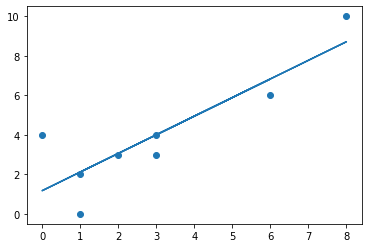

In [21]:
plt.scatter(data['X'], data['Y'])
plt.plot(data['X'], Y_pred)
plt.show()

## Wahrscheinlichkeitsrechnung

Hierzu kann die Bibliothek SciPy, insbesondere das statistik Modul benutzt werden. [https://docs.scipy.org/doc/scipy/reference/index.html](https://docs.scipy.org/doc/scipy/reference/index.html)

### Binomialverteilung

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html



In [22]:
n, p = 4, 0.25
mean, variance, skew, kurt = binom.stats(n, p, moments='mvsk') # mean, variance, skew, kurt
print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Skew: {skew:.2f}")
print(f"Kurt: {kurt:.2f}")
print(f"Propability of k=1: {binom.pmf(1, n, p):.2f}")
print(f"Commulative propability of k<=1: {binom.cdf(1, n, p):.2f}")
print(f"Standard deviation: {binom.std(n, p):.2f}")
print(f"Variation coefficient at k=1: {binom.std(n, p)/binom.pmf(1, n, p):.2f}")

Mean: 1.00
Variance: 0.75
Skew: 0.58
Kurt: -0.17
Propability of k=1: 0.42
Commulative propability of k<=1: 0.74
Standard deviation: 0.87
Variation coefficient at k=1: 2.05


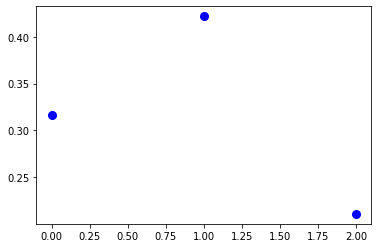

In [23]:
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.show()

### Normalverteilung

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Mean: 3.00
Variance: 16.00
Skew: 0.00
Kurt: 0.00
Propability of k=0.1: 0.08
Commulative propability of k<=0.1: 0.23
Standard deviation: 4.00
Variation coefficient at k=0.1: 52.16


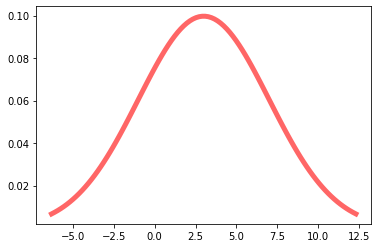

In [24]:
loc, scale = 3, 4
mean, variance, skew, kurt = norm.stats(loc=loc, scale=scale, moments='mvsk') # mean, variance, skew, kurt
print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Skew: {skew:.2f}")
print(f"Kurt: {kurt:.2f}")
print(f"Propability of k=0.1: {norm.pdf(0.1, loc=loc, scale=scale):.2f}")
print(f"Commulative propability of k<=0.1: {norm.cdf(0.1, loc=loc, scale=scale):.2f}")
print(f"Standard deviation: {norm.std(loc=loc, scale=scale):.2f}")
print(f"Variation coefficient at k=0.1: {norm.std(loc=loc, scale=scale)/norm.pdf(0.1, loc=loc, scale=scale):.2f}")
x = np.linspace(norm.ppf(0.01, loc=loc, scale=scale), norm.ppf(0.99, loc=loc, scale=scale), 100)
plt.plot(x, norm.pdf(x, loc=loc, scale=scale), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.show()

In [25]:
norm.cdf(7, loc, scale) - norm.cdf(3, loc, scale)

0.3413447460685429

## Induktive Statistik


In [26]:
data = [1000, 1100, 1100, 1100, 2500, 2600, 2700, 2750, 2790, 2820, 4000, 30000]#
data = [176, 180, 181, 168, 177, 186, 184, 173, 182, 177]
mean = statistics.fmean(data)
print(f"Mode: {statistics.mode(data)}")
print(f"Median: {statistics.median(data):.2f}")
print(f"Mean Mü: {statistics.fmean(data):.2f}")
print(f"Variance sigma^2: {statistics.variance(data, mean):.4f}")
print(f"Standard Deviation sigma: {statistics.stdev(data, mean):.4f}")
print(f"Variationskoeffizient v: {statistics.stdev(data, mean)/statistics.mean(data):.4f}")

Mode: 177
Median: 178.50
Mean Mü: 178.40
Variance sigma^2: 28.7111
Standard Deviation sigma: 5.3583
Variationskoeffizient v: 0.0300
